<a href="https://colab.research.google.com/github/Buterbrod/Deep-Learning-School-2021/blob/main/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

### Личная вставка. Подключить Kaggle к Colab и забрать файлы соревнования



**Предварительные шаги:**
- зайти на https://www.kaggle.com
- войти в account
- API, Create New API Token
- сохранить JSON на диск для дальнейшего подключения

Документация:
- [kaggle-api](https://github.com/Kaggle/kaggle-api)
- [инструкция из интернета](https://askdev.ru/q/ispolzovanie-naborov-dannyh-kaggle-v-google-colab-581252)

**Предварительные шаги:**
- зайти на https://www.kaggle.com
- войти в account
- API, Create New API Token
- сохранить JSON на диск для дальнейшего подключения

In [ ]:
# Запустить и выбрать kaggle.json, ранее выгруженный файл с Kaggle account страницы
from google.colab import files
files.upload()
None

Saving kaggle.json to kaggle.json


In [ ]:
# Убедимся, что kaggle.json файл загрузился
!ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Oct 13 20:26 kaggle.json


In [ ]:
# Установим клиент Kaggle API
!pip install -q kaggle

In [ ]:
# Клиент Kaggle API ожидает файл kaggle.json в ~/.kaggle
# Переместим его туда
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Включим warning для Kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Выведем список файлов соревнования advanced-dls-spring-2021
!kaggle competitions files advanced-dls-spring-2021

name             size  creationDate         
--------------  -----  -------------------  
test.csv        213KB  2021-03-03 13:03:16  
submission.csv   14KB  2021-03-03 13:03:16  
train.csv       648KB  2021-03-03 13:03:16  


In [ ]:
# Загрузим все данные по соревнованию с Kaggle на Colab
!kaggle competitions download -p /data/advanced-dls-spring-2021 --force advanced-dls-spring-2021

  0% 0.00/213k [00:00<?, ?B/s]
100% 213k/213k [00:00<00:00, 78.9MB/s]
  0% 0.00/14.4k [00:00<?, ?B/s]
100% 14.4k/14.4k [00:00<00:00, 12.6MB/s]
  0% 0.00/648k [00:00<?, ?B/s]
100% 648k/648k [00:00<00:00, 92.1MB/s]


In [ ]:
# Выведем список загруженных файлов
!ls /data/advanced-dls-spring-2021

submission.csv	test.csv  train.csv


### Код задания

In [ ]:
# data = pd.read_csv('./train.csv')

data = pd.read_csv('/data/advanced-dls-spring-2021/train.csv')
test = pd.read_csv('/data/advanced-dls-spring-2021/test.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
# -------------------------------------------------------
# YOUR CODE
# -------------------------------------------------------

In [ ]:
# -------------------------------------------------------
# 1) Посмотрите на случайные строчки.
# -------------------------------------------------------
import random

# задать количество выбираемых строк
NUM_ROWS = 5

# получить отсортированный список случайных идентификаторов строк
rows = [random.randint(0, data.shape[0]) for i in range(NUM_ROWS)]
rows.sort()

# отобразить строки
data.take(rows)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
188,1,44.35,44.35,Female,0,Yes,Yes,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),1
448,46,69.10,3255.35,Female,1,No,No,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),0
3451,3,60.25,170.5,Female,0,No,No,Yes,Yes,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,0
3569,4,80.10,336.15,Male,0,No,No,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
3767,1,19.80,19.8,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
# -------------------------------------------------------
# 2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) 
#    с помощью data.isna() или data.info() и, если нужно, замените их на что-то.
#    Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.
# -------------------------------------------------------

# Немного потестируем на простом примере
# Создадим тестовый пример c None и Null значениями
df = pd.DataFrame(
        dict( age=[5, 6, np.NaN],
              born=[pd.NaT, pd.Timestamp('1939-05-27'), pd.Timestamp('1940-04-25')],
              name=['Alfred', 'Batman', ''],
              toy=[None, 'Batmobile', 'Joker']))
df

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,,Joker


In [ ]:
# Применим к нему isna
df_isna = df.isna()
df_isna

,age,born,name,toy
0,False,True,False,True
1,False,False,False,False
2,True,False,False,False


In [ ]:
# Отобразим количество NaN элементов по каждому столбцу
def retrieve_column_nan_counts(df):
  df_isna = df.isna()
  df_nan = pd.DataFrame(columns=['column_name', 'nan_count'])
  for i, column_name in enumerate(df_isna.columns):
    df_nan.loc[i] = [column_name] + [df_isna[df_isna[column_name] == True].shape[0]]
  return df_nan

df_nan = retrieve_column_nan_counts(df)
print("### Total NaN counts: " + str(df_nan['nan_count'].sum()))
df_nan

### Total NaN counts: 3


,column_name,nan_count
0,age,1
1,born,1
2,name,0
3,toy,1


In [ ]:
# Теперь применим её к нашим основным данным
data_nan = retrieve_column_nan_counts(data)
print("### Total NaN counts: " + str(data_nan['nan_count'].sum()))
data_nan

### Total NaN counts: 0


,column_name,nan_count
0,ClientPeriod,0
1,MonthlySpending,0
2,TotalSpent,0
3,Sex,0
4,IsSeniorCitizen,0
5,HasPartner,0
6,HasChild,0
7,HasPhoneService,0
8,HasMultiplePhoneNumbers,0
9,HasInternetService,0


In [ ]:
# NaN данных нет, что подтверждает табличка data.info
print("### Всего строк в данных: " + str(data.shape[0]))
print("### Смотри стобец 'Non-Null Count' - там тоже везде " + str(data.shape[0]) + " строки")
data.info()

### Всего строк в данных: 5282
### Смотри стобец 'Non-Null Count' - там тоже везде 5282 строки
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection    

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [ ]:
# YOUR CODE

In [ ]:
# 1) Для численных признаков постройте гистограмму (plt.hist(...)) или boxplot (plt.boxplot(...)). 
#    Для категориальных посчитайте количество каждого значения для каждого признака.
#    Для каждой колонки надо сделать data.value_counts() и построить bar диаграммы plt.bar(...) 
#    или круговые диаграммы plt.pie(...)
#   (хорошо, еcли вы сможете это сделать на одном гарфике с помощью plt.subplots(...)).

# 2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.


In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Выведем данные категориальных признаков
for column_name in cat_cols:
    print(len(data[column_name].unique()), column_name + ':', data[column_name].unique())

2 Sex: ['Male' 'Female']
2 IsSeniorCitizen: [0 1]
2 HasPartner: ['Yes' 'No']
2 HasChild: ['Yes' 'No']
2 HasPhoneService: ['Yes' 'No']
3 HasMultiplePhoneNumbers: ['No' 'Yes' 'No phone service']
3 HasInternetService: ['No' 'Fiber optic' 'DSL']
3 HasOnlineSecurityService: ['No internet service' 'No' 'Yes']
3 HasOnlineBackup: ['No internet service' 'No' 'Yes']
3 HasDeviceProtection: ['No internet service' 'No' 'Yes']
3 HasTechSupportAccess: ['No internet service' 'Yes' 'No']
3 HasOnlineTV: ['No internet service' 'No' 'Yes']
3 HasMovieSubscription: ['No internet service' 'No' 'Yes']
3 HasContractPhone: ['One year' 'Two year' 'Month-to-month']
2 IsBillingPaperless: ['No' 'Yes']
4 PaymentMethod: ['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']


In [ ]:
# Выведем типы колонок числовых признаков
for column_name in num_cols:
    print(column_name + ": " + str(type(data[column_name][0])))

ClientPeriod: <class 'numpy.int64'>
MonthlySpending: <class 'numpy.float64'>
TotalSpent: <class 'str'>


In [ ]:
# TotalSpent признак - строка (class 'str'), сконвертируем её во float, предварительно заменив пробелы на 0
data.loc[data['TotalSpent']==' ', ('TotalSpent')] = 0
data['TotalSpent'] = data['TotalSpent'].astype(float)

test.loc[test['TotalSpent']==' ', ('TotalSpent')] = 0
test['TotalSpent'] = test['TotalSpent'].astype(float)

None


In [ ]:
# Выведем типы колонок числовых признаков
for column_name in num_cols:
    print(column_name + ": " + str(type(data[column_name][0])))

ClientPeriod: <class 'numpy.int64'>
MonthlySpending: <class 'numpy.float64'>
TotalSpent: <class 'numpy.float64'>


In [ ]:
import math

# развернуть число в строку, столбец
# если число < 6 - две колонки
# иначе, - три колонки
def getRowColumn (lines):
  column = row = 1
  num_columns = 2 if (len(lines) < 6) else 3;
  num_rows = math.ceil(len(lines) / num_columns)
  for i in range(len(lines)):
    if column == num_columns:
      column = 1
      row = row + 1
    if i%num_columns:
      column = column + 1;
    yield i+1, row, column, num_rows, num_columns

# проверим
for i, row, column, num_rows, num_columns in getRowColumn(range(10)):
  print(str(i) + 
        " row: " + str(row) + 
        " column: " + str(column) + 
        " num_columns: " + str(num_columns) +
        " num_rows: " + str(num_rows))

1 row: 1 column: 1 num_columns: 3 num_rows: 4
2 row: 1 column: 2 num_columns: 3 num_rows: 4
3 row: 1 column: 3 num_columns: 3 num_rows: 4
4 row: 2 column: 1 num_columns: 3 num_rows: 4
5 row: 2 column: 2 num_columns: 3 num_rows: 4
6 row: 2 column: 3 num_columns: 3 num_rows: 4
7 row: 3 column: 1 num_columns: 3 num_rows: 4
8 row: 3 column: 2 num_columns: 3 num_rows: 4
9 row: 3 column: 3 num_columns: 3 num_rows: 4
10 row: 4 column: 1 num_columns: 3 num_rows: 4


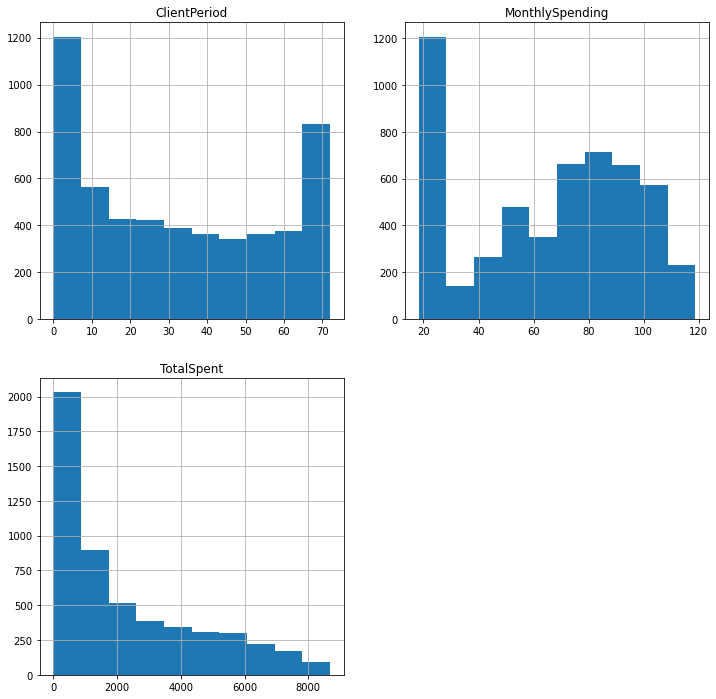

In [ ]:
# Для численных признаков постройте гистограмму (plt.hist(...)) или boxplot (plt.boxplot(...)).
def graph_num_cols(data):
  f = plt.figure() # figsize=(9,16)
  for i, row, column, num_rows, num_columns in getRowColumn(range(len(num_cols))):
    if (i == 1): f.set_size_inches(num_columns * 6, num_rows * 6)
    ax = f.add_subplot(num_rows, num_columns, i)
    ax = data[num_cols[i-1]].hist()#.plot()
    ax.set_title(num_cols[i-1])
  plt.show()

graph_num_cols(data)

Text(0.5, 0.98, 'ClientPeriod')

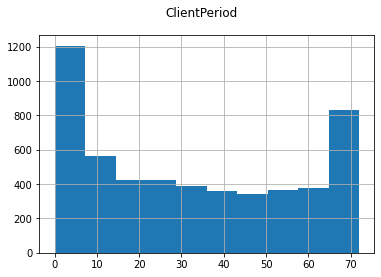

In [ ]:
# Пример единичного графика для ClientPeriod
column = 'ClientPeriod'
h = data[column].hist()
fig = h.get_figure()
fig.suptitle(column)

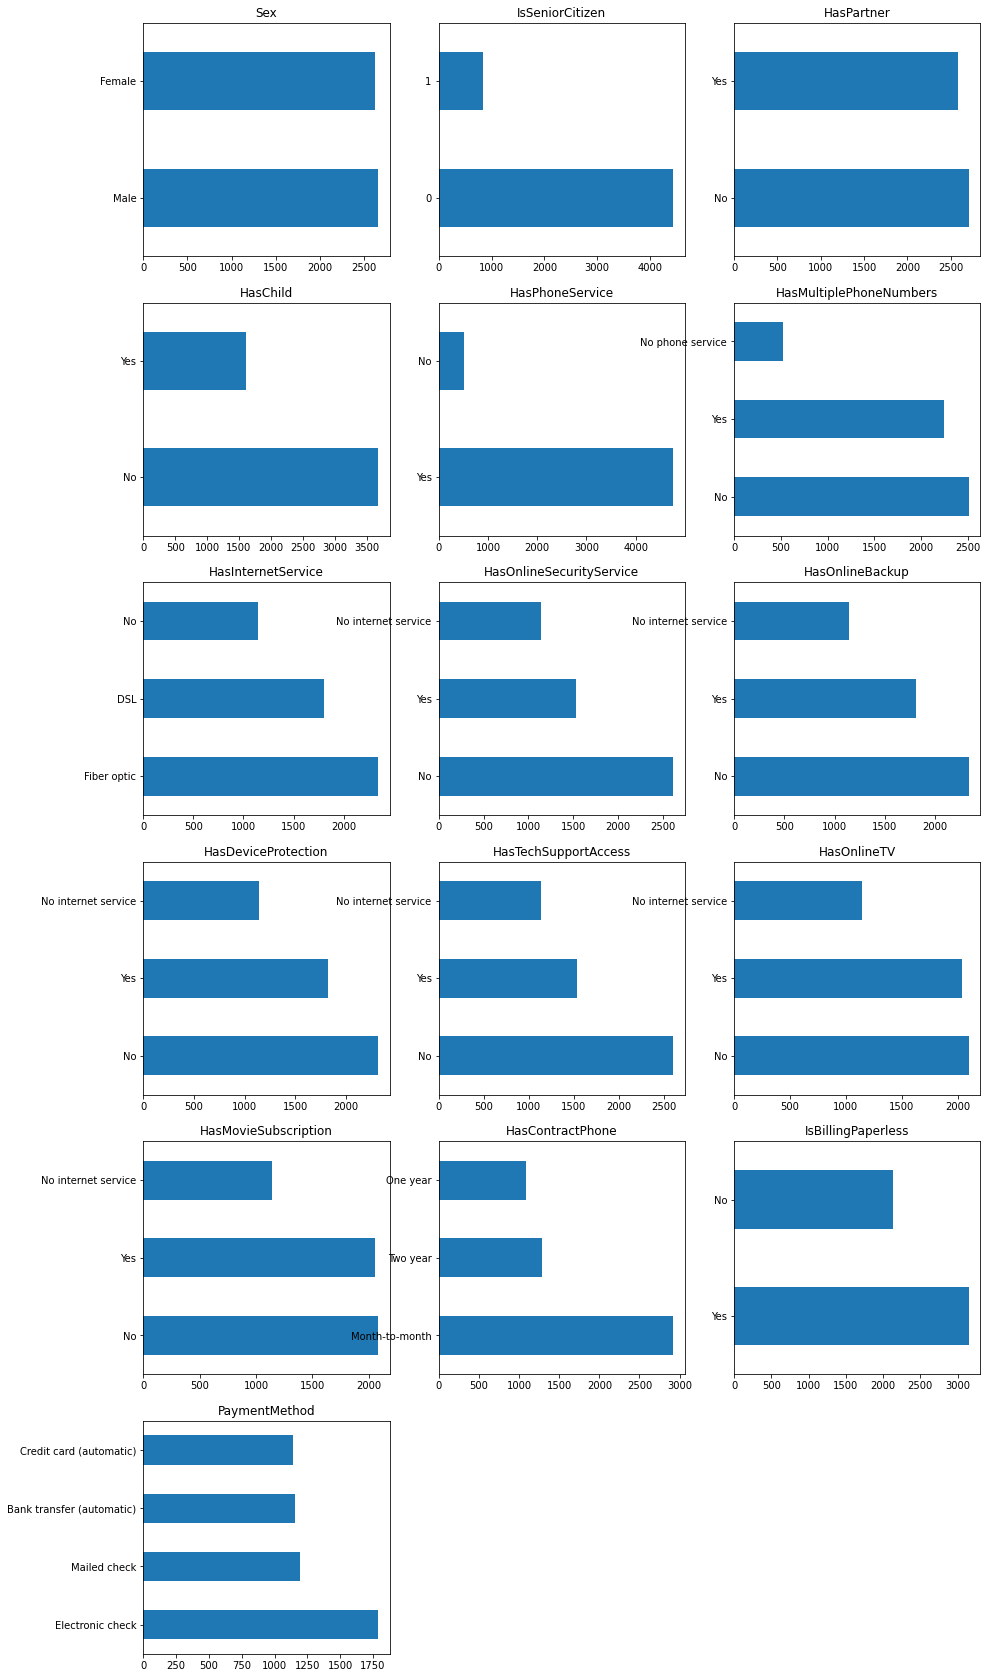

In [ ]:
# Для категориальных признаков постройте гистограмму (plt.hist(...)) или boxplot (plt.boxplot(...)).
def graph_cat_cols(data):
  f = plt.figure() # figsize=(9,16)
  for i, row, column, num_rows, num_columns in getRowColumn(range(len(cat_cols))):
      if (i == 1): f.set_size_inches(num_columns * 5, num_rows * 5)
      ax = f.add_subplot(num_rows, num_columns, i)
      ax = data[cat_cols[i-1]].value_counts().plot(kind='barh')
      ax.set_title(cat_cols[i-1])
  plt.show()

graph_cat_cols(data)

Male      2655
Female    2627
Name: Sex, dtype: int64

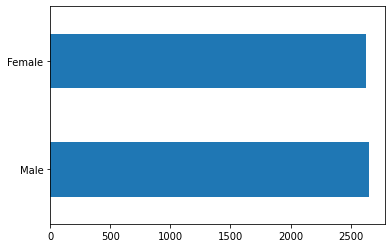

In [ ]:
# для примера оставил вывод картинки для признака Sex
column = 'Sex'
data[column].value_counts().plot(kind='barh')
data[column].value_counts()

Text(0.5, 0.98, 'Sex')

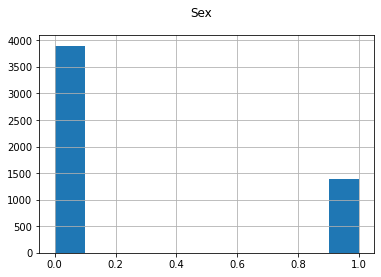

In [ ]:
# 2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.
h = data[target_col].hist()
fig = h.get_figure()
fig.suptitle(column)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
# YOUR CODE

In [ ]:
# 1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression.
#    Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

X_num_train, X_num_test = data[num_cols], test[num_cols]
X_cat_train, X_cat_test = data[cat_cols], test[cat_cols]

In [ ]:
# Объединим массив тестовых и проверочных данных, чтобы работать одинаково с массивами
all_data_1 = data
all_data_1['IsTrainData'] = 1
all_data_2 = test
all_data_2['Churn'] = 1
all_data_2['IsTrainData'] = 0
all_data = pd.concat([all_data_1, all_data_2], axis=0)

# Положим их в соответствующие массивы
columns = cat_cols
columns.append('IsTrainData')
cat_data = all_data[columns]

In [ ]:
# Выведем данные категориальных столбцов
for column_name in cat_cols:
    print(len(all_data[column_name].unique()), column_name + ':', all_data[column_name].unique())

2 Sex: ['Male' 'Female']
2 IsSeniorCitizen: [0 1]
2 HasPartner: ['Yes' 'No']
2 HasChild: ['Yes' 'No']
2 HasPhoneService: ['Yes' 'No']
3 HasMultiplePhoneNumbers: ['No' 'Yes' 'No phone service']
3 HasInternetService: ['No' 'Fiber optic' 'DSL']
3 HasOnlineSecurityService: ['No internet service' 'No' 'Yes']
3 HasOnlineBackup: ['No internet service' 'No' 'Yes']
3 HasDeviceProtection: ['No internet service' 'No' 'Yes']
3 HasTechSupportAccess: ['No internet service' 'Yes' 'No']
3 HasOnlineTV: ['No internet service' 'No' 'Yes']
3 HasMovieSubscription: ['No internet service' 'No' 'Yes']
3 HasContractPhone: ['One year' 'Two year' 'Month-to-month']
2 IsBillingPaperless: ['No' 'Yes']
4 PaymentMethod: ['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']
2 IsTrainData: [1 0]


In [ ]:
# применим к ним One-Hot Encoding
new_cat_data = pd.get_dummies(cat_data)
print('Размер категориальных данных до: '+str(cat_data.shape)+', после One-Hot Encoding: '+str(new_cat_data.shape))

Размер категориальных данных до: (7043, 17), после One-Hot Encoding: (7043, 43)


In [ ]:
# нормализуем численные признаки
train_data = all_data[all_data['IsTrainData']==1][num_cols]
test_data  = all_data[all_data['IsTrainData']==0][num_cols]

scaler = StandardScaler()
new_num_train_data = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns)
new_num_test_data = pd.DataFrame(scaler.transform(test_data), columns=test_data.columns)
new_num_train_data.head(3)

,ClientPeriod,MonthlySpending,TotalSpent
0,0.920767,-1.505447,-0.555852
1,1.613288,-1.294998,-0.183039
2,-1.279005,0.363737,-0.974768


In [ ]:
# вернуть min_max для данных
def f_min_max(data, title_min='min', title_max='max'):
  min_max = pd.concat([pd.DataFrame(data.min()), pd.DataFrame(data.max())], axis=1)
  min_max.columns = [title_min, title_max]
  return min_max

In [ ]:
min_max_train = pd.concat([
                           f_min_max(train_data, 'train_min', 'train_max'),
                           f_min_max(new_num_train_data, 'new_train_min', 'new_train_max')
                          ], axis=1)
min_max_train

,train_min,train_max,new_train_min,new_train_max
ClientPeriod,0.00,72.00,-1.319741,1.613288
MonthlySpending,18.25,118.75,-1.546873,1.783852
TotalSpent,0.00,8684.80,-1.008221,2.819648


In [ ]:
new_cat_data[new_cat_data['IsTrainData']==1]

,IsSeniorCitizen,IsTrainData,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,0,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,1,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
5278,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0
5279,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
5280,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
# Объединим преобразованные данные вместе
orig_test_data = test_data
orig_train_data = train_data

new_cat_train_data = new_cat_data[new_cat_data['IsTrainData']==1]
new_cat_test_data  = new_cat_data[new_cat_data['IsTrainData']==0]

new_cat_train_data.drop(['IsTrainData'], axis = 1)
new_cat_test_data.drop(['IsTrainData'], axis = 1)

Y_train_data = data['Churn']

train_data = pd.concat([new_num_train_data, new_cat_train_data], axis=1)
test_data  = pd.concat([new_num_test_data, new_cat_test_data], axis=1)

In [ ]:
# Утянем к себе красивую процедурку отсюда: 
# https://colab.research.google.com/drive/163o53qfrOvs1_lEGBlV2NYW3K8LQPgXo#scrollTo=DsIxH1vZvh-l
def search_and_draw(X, y, model, param_name, grid, param_scale='ordinary', draw=True):
    parameters = {param_name: grid}
    
    # Найти наилучшие параметры, путем обычного перебора
    CV_model = GridSearchCV(estimator=model, 
                            param_grid=parameters,
                            cv=5, 
                            scoring='f1',
                            n_jobs=-1, 
                            verbose=10)
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    
    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)


        if (param_scale == 'log'):
            plt.xscale('log')

        plt.plot(grid, means, label='mean values of score', color='red', lw=3)

        plt.fill_between(grid, means - 2 * error, means + 2 * error, 
                         color='green', label='filled area between errors', alpha=0.5)
        legend_box = plt.legend(framealpha=1).get_frame()
        legend_box.set_facecolor("white")
        legend_box.set_edgecolor("black")
        plt.xlabel('parameter')
        plt.ylabel('roc_auc')
        plt.show()
        
    return means, error

In [ ]:
# 2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте 
# разные значения гиперпараметра C и выберите лучший
# (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.
# Если вы разделяете на train/valid, то используйте LogisticRegressionCV.
# Он сам при вызове .fit() подберет параметр С. 
# (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались
# значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем 
# датасете с лучшим параметром C).
# * (более сложный вариант) Если вы будете использовать кроссвалидацию, то 
# преобразования данных и LogisticRegression нужно соединить в один Pipeline с
# помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо 
# передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию 
# LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом 
# числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm

In [ ]:
# Если вы разделяете на train/valid, то используйте LogisticRegressionCV.
# Он сам при вызове .fit() подберет параметр С. 
# (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались
# значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем 
# датасете с лучшим параметром C).

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

global_scores = []
clf = LogisticRegressionCV(max_iter=1000,scoring='roc_auc', refit=True)

for train_indices, val_indices in tqdm(kf.split(train_data), total=5):

    # обучающая выборка
    X_train_kf = train_data.iloc[train_indices]
    Y_train_kf = Y_train_data.iloc[train_indices]

    # тестовая выборка
    X_val_kf = train_data.iloc[val_indices]
    Y_val_kf = Y_train_data.iloc[val_indices]

    # обучить модель на обучающей выборке
    clf.fit(X_train_kf, Y_train_kf)

    # получить метрику roc_auc на тестовой выборке
    scores = roc_auc_score(Y_val_kf, clf.predict_proba(X_val_kf)[:, 1])
    
    global_scores.append([scores, clf.Cs])

global_scores = np.stack(global_scores, axis=0)

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
# выведем лучший score
max_score = 0
max_cs = 0
for scores in global_scores:
  if max_score < scores[0]:
    max_score = scores[0]
    max_cs = scores[1]
print('Лучший score: ' + str(max_score) + ' при С = ' + str(max_cs))

Лучший score: 0.8528821885158147 при С = 10.0


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
# YOUR CODE

In [ ]:
# если этого модуля нет, то нужно раскомментировать следующую строчку и запустить
!pip install catboost

     |████████████████████████████████| 76.4 MB 21 kB/s 


In [ ]:
import catboost # документация: https://catboost.ai/docs

In [ ]:
# CatBoost умеет работать с категориальными признаками сам
X_train_origin, X_test_origin, Y_train_origin, Y_test_origin = train_test_split(
                    data.values, 
                    Y_train_data.values, 
                    train_size=0.8, 
                    random_state=42)
X_train_origin = pd.DataFrame(X_train_origin, columns=data.columns)
X_test_origin  = pd.DataFrame(X_test_origin, columns=data.columns)

In [ ]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200,
                                             cat_features=cat_cols)

boosting_model.fit(X_train_origin, Y_train_origin)

Y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
Y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

Learning rate set to 0.083391
0:	learn: 0.4601281	total: 14.3ms	remaining: 2.85s
1:	learn: 0.3018192	total: 27.1ms	remaining: 2.69s
2:	learn: 0.2040783	total: 40.7ms	remaining: 2.67s
3:	learn: 0.1358865	total: 55.5ms	remaining: 2.72s
4:	learn: 0.0917941	total: 67.7ms	remaining: 2.64s
5:	learn: 0.0645440	total: 80.1ms	remaining: 2.59s
6:	learn: 0.0464856	total: 95ms	remaining: 2.62s
7:	learn: 0.0328627	total: 103ms	remaining: 2.46s
8:	learn: 0.0224436	total: 111ms	remaining: 2.35s
9:	learn: 0.0172441	total: 121ms	remaining: 2.3s
10:	learn: 0.0139279	total: 135ms	remaining: 2.32s
11:	learn: 0.0102320	total: 141ms	remaining: 2.21s
12:	learn: 0.0086536	total: 154ms	remaining: 2.22s
13:	learn: 0.0070316	total: 164ms	remaining: 2.18s
14:	learn: 0.0057548	total: 179ms	remaining: 2.21s
15:	learn: 0.0047121	total: 189ms	remaining: 2.18s
16:	learn: 0.0038313	total: 201ms	remaining: 2.16s
17:	learn: 0.0033482	total: 212ms	remaining: 2.15s
18:	learn: 0.0028402	total: 221ms	remaining: 2.11s
19:	lea

train_auc: 1.0
test_auc: 1.0


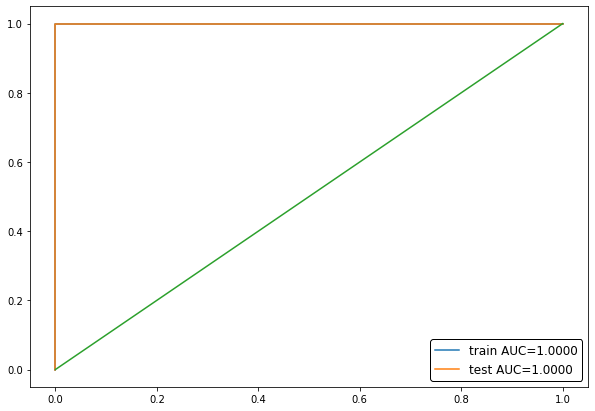

In [ ]:
from sklearn.metrics import roc_curve

train_auc = roc_auc_score(Y_train_origin, Y_train_predicted)
print('train_auc: ' + str(train_auc))
test_auc = roc_auc_score(Y_test_origin, Y_test_predicted)
print('test_auc: ' + str(test_auc))

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(Y_train_origin, Y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(Y_test_origin, Y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
best_model = boosting_model # какая-то предыдущая модель

In [ ]:
# X_test = pd.read_csv('./test.csv')
# submission = pd.read_csv('./submission.csv')
#
# submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
# submission.to_csv('./my_submission.csv')

X_test = pd.read_csv('/data/advanced-dls-spring-2021/test.csv')
submission = pd.read_csv('/data/advanced-dls-spring-2021/submission.csv')

submission['Churn'] = best_model.predict_proba(X_test) / best_model.predict(X_test)
#submission.to_csv('./data/advanced-dls-spring-2021/my_submission.csv')

CatBoostError: ignored

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

In [ ]:
# 622
# Sergey_Startsev
# 0.84816
# Your submission scored 0.84778, which is not an improvement of your best score. Keep trying!